# Importing Libraries

In [67]:
pip install matplotlib==3.4.3 seaborn==0.13.2


  Using cached matplotlib-3.4.3.tar.gz (37.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [28 lines of output]
      C:\Users\User\AppData\Local\Temp\pip-install-fdt7_y_i\matplotlib_6f2bb54a57d34d60bad38ad0c4f0ae3a\setup.py:34: SetuptoolsDeprecationWarning: The test command is disabled and references to it are deprecated.
      !!
      
              ********************************************************************************
              Please remove any references to `setuptools.command.test` in all supported versions of the affected package.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid build errors in the future.
              ********************************************************************************
      
      !!
        from setuptools.command.test import test as TestCommand
      Traceback (most recent call last):
        File "<string>", line 2, in <modu

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [69]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


# Importing data 

In [70]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [71]:
print (train.shape, test.shape)

(614, 13) (367, 12)


# EDA & Data-Preprocessing

### Viewing the train dataset

In [72]:
train.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Viewing no of null data in each feature of the train dataset

In [74]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Viewing the test dataset

In [75]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### Viewing no of null data in each feature of the test dataset

In [77]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Counting frequency of categories for each categorical features

In [78]:
data = [train,test]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID' ]]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (train[col].value_counts())


Frequency of Categories for variable Gender
Gender
Male      489
Female    112
Name: count, dtype: int64

Frequency of Categories for variable Married
Married
Yes    398
No     213
Name: count, dtype: int64

Frequency of Categories for variable Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Frequency of Categories for variable Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Frequency of Categories for variable Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Frequency of Categories for variable Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


#### Plotting No. of Males vs No. of Females

In [79]:
sns.countplot(train['Gender'])


<Axes: xlabel='Features', ylabel='Gender'>

#### Approval of loans between Males & Females

In [80]:
pd.crosstab(train.Gender, train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


> The male are in large number as compared to female applicants.

### Filling up NAN values of Gender and Converting categorial variables(Male,Female) to numerical variables(0,1)

In [81]:
train.Gender = train.Gender.fillna(train.Gender.mode())
test.Gender = test.Gender.fillna(test.Gender.mode())

sex = pd.get_dummies(train['Gender'] , drop_first = True )
train.drop(['Gender'], axis = 1 , inplace =True)
train = pd.concat([train , sex ] , axis = 1)

sex = pd.get_dummies(test['Gender'] , drop_first = True )
test.drop(['Gender'], axis = 1 , inplace =True)
test = pd.concat([test , sex ] , axis = 1)

### Plotting No. of Dependants (Size of family) in each household

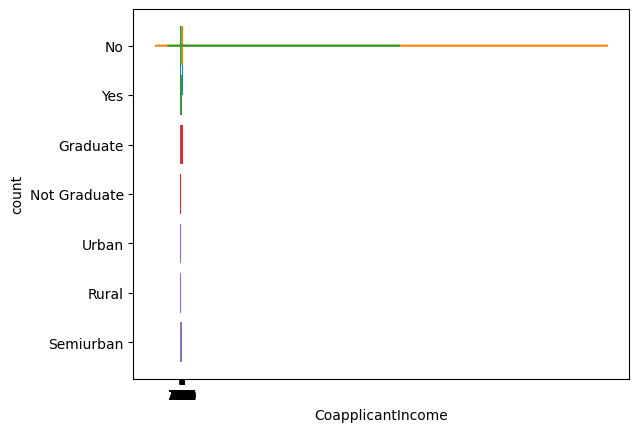

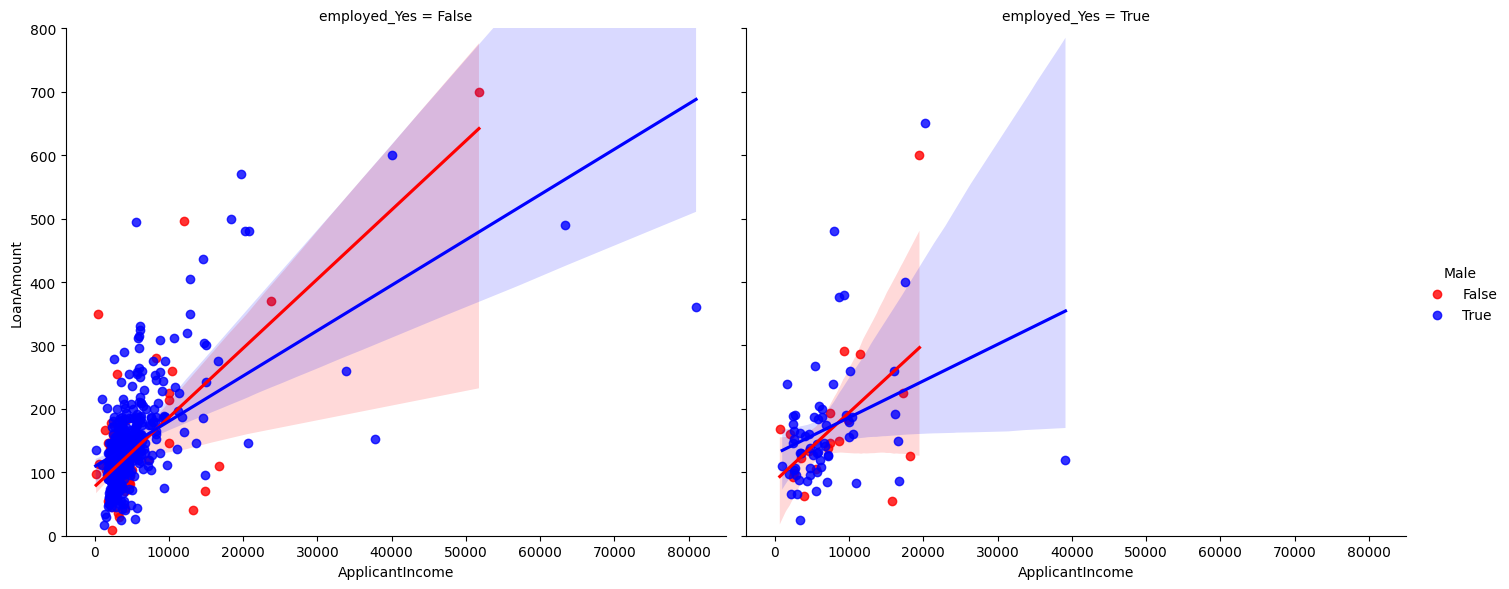

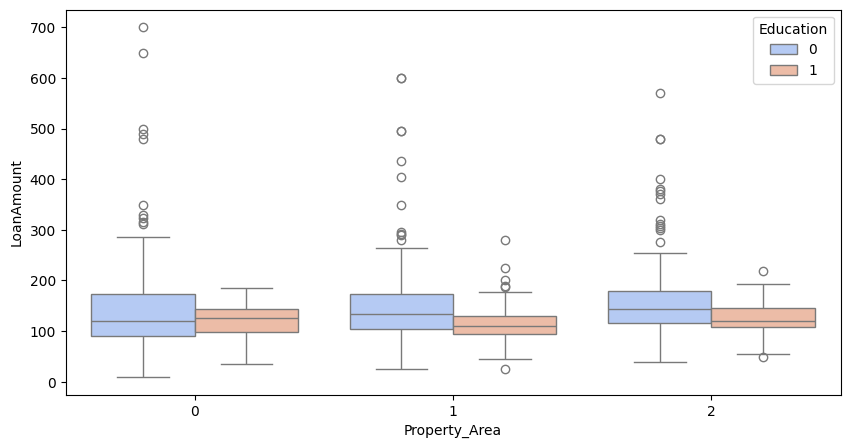

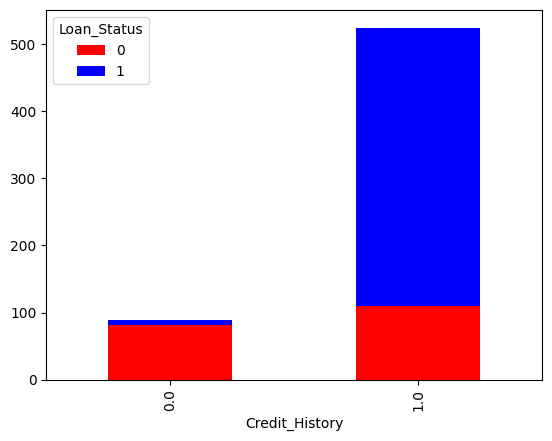

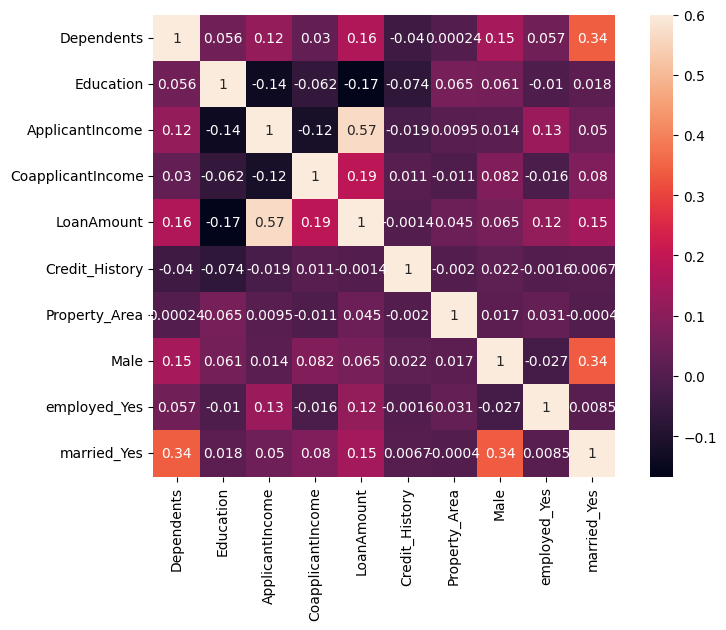

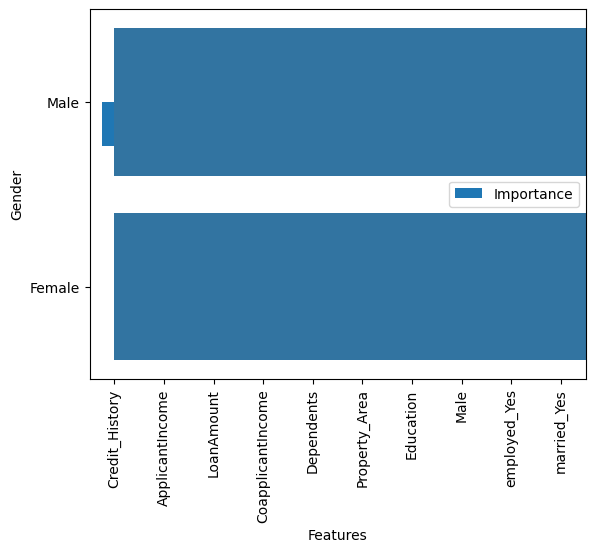

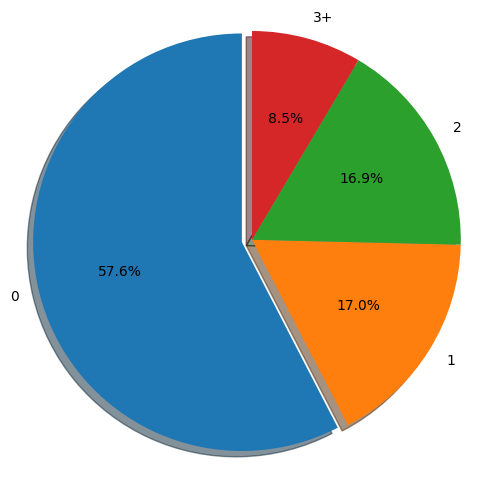

In [82]:
plt.figure(figsize=(6,6))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [83]:
train.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

### Approval of loans between different sizes of families

In [84]:
pd.crosstab(train.Dependents , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


> The applicants with highest number of dependants are least in number whereas applicants with no dependance are greatest among these.

### Filling up NAN values of Dependents and Converting categorial variables(1,2,3+) to numerical variables(1,2,3)

In [85]:
train.Dependents = train.Dependents.fillna("0")
test.Dependents = test.Dependents.fillna("0")

rpl = {'0':'0', '1':'1', '2':'2', '3+':'3'}

train.Dependents = train.Dependents.replace(rpl).astype(int)
test.Dependents = test.Dependents.replace(rpl).astype(int)

### Plotting No. of people with vs without Credit History

In [86]:
sns.countplot(train['Credit_History'])

<Axes: ylabel='count'>

### Approval of loans people those who have Credit History and those who don't

In [87]:
pd.crosstab(train.Credit_History , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


### Filling up NAN values of Credit history by taking the mode

In [88]:
train.Credit_History = train.Credit_History.fillna(train.Credit_History.mode()[0])
test.Credit_History  = test.Credit_History.fillna(test.Credit_History.mode()[0])

### Plotting No. of people who are Self-employed vs who aren't

In [89]:
sns.countplot(train['Self_Employed'])

<Axes: xlabel='count', ylabel='count'>

### Approval of loans between people who are Self-employed & who aren't

In [90]:
pd.crosstab(train.Self_Employed , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


### Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)

In [91]:
train.Self_Employed = train.Self_Employed.fillna(train.Self_Employed.mode())
test.Self_Employed = test.Self_Employed.fillna(test.Self_Employed.mode())

self_Employed = pd.get_dummies(train['Self_Employed'] ,prefix = 'employed' ,drop_first = True )
train.drop(['Self_Employed'], axis = 1 , inplace =True)
train = pd.concat([train , self_Employed ] , axis = 1)

self_Employed = pd.get_dummies(test['Self_Employed'] , prefix = 'employed' ,drop_first = True )
test.drop(['Self_Employed'], axis = 1 , inplace =True)
test = pd.concat([test , self_Employed ] , axis = 1)

### Plotting No. of Married people vs Unmarried people

In [92]:
sns.countplot(train.Married)

<Axes: xlabel='count', ylabel='count'>

### Approval of loans between Married and Unmarried people

In [93]:
pd.crosstab(train.Married , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


### Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)

In [94]:
train.Married = train.Married.fillna(train.Married.mode())
test.Married = test.Married.fillna(test.Married.mode())

married = pd.get_dummies(train['Married'] , prefix = 'married',drop_first = True )
train.drop(['Married'], axis = 1 , inplace =True)
train = pd.concat([train , married ] , axis = 1)

married = pd.get_dummies(test['Married'] , prefix = 'married', drop_first = True )
test.drop(['Married'], axis = 1 , inplace =True)
test = pd.concat([test , married ] , axis = 1)

### Filling up NAN values of Loan Amount Term

In [95]:
train.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)
test.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)

train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean()).astype(int)
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean()).astype(int)

In [96]:
sns.distplot(train['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='count'>

> We observe no outliers in the continuous variable Loan Amount

### Plotting Graduates vs Non-Graduates

In [97]:
sns.countplot(train.Education)

<Axes: xlabel='LoanAmount', ylabel='count'>

### Converting categorial variables to numerical variables

In [98]:
train['Education'] = train['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)
test['Education'] = test['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)

### Property Area

In [99]:
sns.countplot(train.Property_Area)

<Axes: xlabel='LoanAmount', ylabel='count'>

### Converting categorial variables to numerical variables

In [100]:
train['Property_Area'] = train['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

test.Property_Area = test.Property_Area.fillna(test.Property_Area.mode())
test['Property_Area'] = test['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)


### Plotting Co-Applicant income and Applicant income

In [101]:
sns.distplot(train['ApplicantIncome'])

<Axes: xlabel='ApplicantIncome', ylabel='count'>

In [102]:
sns.distplot(train['CoapplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='count'>

In [103]:
train['Loan_Status'] = train['Loan_Status'].map( {'N': 0, 'Y': 1 } ).astype(int)

### Dropping the ID column

In [104]:
train.drop(['Loan_ID'], axis = 1 , inplace =True)

### Viewing the Datasets

In [105]:
train.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Male,employed_Yes,married_Yes
0,0,0,5849,0.0,146,1.0,0,1,True,False,False
1,1,0,4583,1508.0,128,1.0,2,0,True,False,True
2,0,0,3000,0.0,66,1.0,0,1,True,True,True
3,0,1,2583,2358.0,120,1.0,0,1,True,False,True
4,0,0,6000,0.0,141,1.0,0,1,True,False,False


In [106]:
test.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Male,employed_Yes,married_Yes
0,LP001015,0,0,5720,0,110,1.0,0,True,False,True
1,LP001022,1,0,3076,1500,126,1.0,0,True,False,True
2,LP001031,2,0,5000,1800,208,1.0,0,True,False,True
3,LP001035,2,0,2340,2546,100,1.0,0,True,False,True
4,LP001051,0,1,3276,0,78,1.0,0,True,False,False


In [107]:
g = sns.lmplot(x='ApplicantIncome',y='LoanAmount',data= train , col='employed_Yes', hue='Male',
          palette= ["Red" , "Blue","Yellow"] ,aspect=1.2,height=6)
g.set(ylim=(0, 800))
##Relation Between the Male or female Applicant's income , Loan taken and Self employment.

### Boxplots for  relation between Property Area, Amount of Loan and Education qualification 

In [108]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=train, palette="coolwarm")

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

### Relation between Credit History and Loan status.

In [109]:
train.Credit_History.value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [110]:
lc = pd.crosstab(train['Credit_History'], train['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

<Axes: xlabel='Credit_History'>

- The credit history vs Loan Status indicates:
    - The good credit history applicants have more chances of getting Loan.
    - With better credit History the Loan amount given was greater too.
    - But many were not given loan in the range 0-100
    - The applicant with poor credit history were handled in the range 0-100 only.

In [111]:
plt.figure(figsize=(9,6))
sns.heatmap(train.drop('Loan_Status',axis=1).corr(), vmax=0.6, square=True, annot=True)

<Axes: >

# Modelling

In [112]:
X = train.drop('Loan_Status' , axis = 1 )
y = train['Loan_Status']

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =102)

### Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)
pred_l = logmodel.predict(X_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

83.78378378378379

### Random Forest

In [114]:

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)
pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

81.62162162162161

### K-Nearest Neighbors

In [115]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

61.08108108108108

### Naive Bayes

In [116]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

82.16216216216216

### SVM

In [117]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

70.27027027027027

### Gradient Boosting Classifier

In [118]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

82.16216216216216

In [119]:
## Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','Gradient Boosting Classifier'],
    'Score': [acc_l , acc_rf , acc_knn , acc_gb ,acc_svm ,acc_gbc ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,83.783784
3,Naive Bayes,82.162162
5,Gradient Boosting Classifier,82.162162
1,Random Forrest,81.621622
4,SVM,70.270270
2,K- Nearest Neighbour,61.081081


In [120]:
importances = pd.DataFrame({'Features':X_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11) 

,Importance
Features,
Credit_History,0.238
LoanAmount,0.223
ApplicantIncome,0.212
CoapplicantIncome,0.122
Property_Area,0.056
Dependents,0.051
Education,0.027
Male,0.026
married_Yes,0.025


In [121]:
importances.plot.bar()

<Axes: xlabel='Features'>


## Predict on Testing Dataset

In [122]:
df_test = test.drop(['Loan_ID'], axis = 1)

In [123]:
df_test.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Male,employed_Yes,married_Yes
0,0,0,5720,0,110,1.0,0,True,False,True
1,1,0,3076,1500,126,1.0,0,True,False,True
2,2,0,5000,1800,208,1.0,0,True,False,True
3,2,0,2340,2546,100,1.0,0,True,False,True
4,0,1,3276,0,78,1.0,0,True,False,False


In [124]:
p_log = logmodel.predict(df_test)

In [125]:
p_rf = random_forest.predict(df_test)

In [126]:
predict_combine = np.zeros((df_test.shape[0]))

for i in range(0, test.shape[0]):
    temp = p_log[i] + p_rf[i]
    if temp>=2:
        predict_combine[i] = 1
predict_combine = predict_combine.astype('int')

In [127]:
submission = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Dependents": test["Dependents"],
        "Education": test["Education"],
        "Property_Area": test["Property_Area"],
        "Credit_History": test["Credit_History"],
        "LoanAmount": test["LoanAmount"],
        "ApplicantIncome": test["ApplicantIncome"],
        "Loan_Status": predict_combine
    })

submission["Loan_Status"] = submission["Loan_Status"].map({0: 'N', 1: 'Y'})

submission.to_csv("results.csv", encoding='utf-8', index=False)


In [131]:
# Save Logistic Regression model
with open('logmodel.pkl', 'wb') as f:
    pickle.dump(logmodel, f)

# Save Naive Bayes model
with open('NaiveBayes.pkl', 'wb') as f:
    pickle.dump(gaussian, f)